In [11]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import time
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [12]:
from sklearn.ensemble import IsolationForest
from sklearn.metrics import f1_score,precision_score,recall_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler

In [13]:
seed=42
import joblib

In [14]:
best_params={'n_estimators': 114, 
             'max_samples': 0.11944670503770004, 
             'contamination': 0.03103123295817309, 
             'max_features': 0.11829004013466254, 
             'bootstrap': True,
            'n_jobs': -1 , # Use all available CPU cores
            'random_state' : seed ,# For reproducibility
            }

In [15]:
PATH='OUTPUT/MODIFIED_TYPE_3'

In [16]:
all_files=os.listdir(PATH)
files=[]
for f in all_files:
    if f.endswith('csv'):
        files.append(f)
all_files=files

In [17]:
df=pd.read_csv(PATH+'/'+all_files[0])

In [18]:
df

,timestamp,original,modified,labels
0,2016-01-01 00:00:00,46.44,46.44,0
1,2016-01-01 01:00:00,49.08,49.08,0
2,2016-01-01 02:00:00,48.55,48.55,0
3,2016-01-01 03:00:00,50.06,50.06,0
4,2016-01-01 04:00:00,50.54,50.54,0
...,...,...,...,...
17539,2017-12-31 19:00:00,80.43,80.43,0
17540,2017-12-31 20:00:00,81.72,81.72,0
17541,2017-12-31 21:00:00,81.65,81.65,0
17542,2017-12-31 22:00:00,77.59,77.59,0


In [19]:
anomaly_type=3

In [20]:
f1_scores = []
prec_scores=[]
recall_scores=[]
for fi in all_files:
    building = pd.read_csv(PATH+'/'+fi)
    X_train=building['modified']
    y_train = building['labels'].values
    y_train=np.where(y_train != 0,1,0)
    scaler=StandardScaler()
    X_train=scaler.fit_transform(pd.DataFrame(X_train))
    ind_best_f1=0
    for cont in range(2,6):
        cont/=100
        best_params['contamination']=cont
        
        model = IsolationForest(
            **best_params
            )

        model.fit(X_train)

        y_pred=model.predict(X_train)

        y_pred=np.where(y_pred==-1,1,0)

        score_f1=f1_score(y_train,y_pred, zero_division = 0)

        if score_f1> ind_best_f1:
            score_prec=precision_score(y_train,y_pred, zero_division = 0)
            score_recall=recall_score(y_train,y_pred, zero_division = 0)
            ind_best_f1=score_f1
            ind_best_prec=score_prec
            ind_best_recall=score_recall
    f1_scores.append(ind_best_f1)
    prec_scores.append(ind_best_prec)
    recall_scores.append(ind_best_recall)
    print(ind_best_f1,end="\t")

0.7738095238095238	0.9001490312965723	0.8358662613981762	0.09521384928716903	0.8101788170563963	0.7034035656401944	0.7227722772277229	0.8454608454608455	0.8113998323554066	0.872865275142315	0.11212121212121212	0.8586723768736617	0.11271266540642721	0.7904695164681149	0.16565562295846942	0.8205445544554456	0.7389100126742713	0.9060913705583756	0.46109921484653815	0.8699122106943338	0.9232323232323232	0.2520424836601307	0.38890889449045735	0.8498845265588915	0.8559046587215602	0.9172625127681309	0.32211538461538464	0.6118980169971672	0.6711915535444948	0.6781115879828327	0.8225584594222835	0.24718179954908792	0	0.8236286919831224	0.05863760217983651	0.8715874620829119	0.7027371101209422	0.7319698600645858	0.8407350689127105	0.026141992294991746	0.7159152634437805	0.9099307159353349	0.9054573405073021	0.1274840644919385	0.6435331230283912	0.288864388092613	0.6227621483375958	0.24433497536945814	0.8348348348348348	0.11657506508533409	0.17177344475394615	0.3096559378468368	0.499506416584402

In [21]:
print(np.mean(f1_scores))

0.5677963649006623


In [22]:
print(np.mean(prec_scores))

0.7026628137455387


In [23]:
print(np.mean(recall_scores))

0.5876138248727012


In [24]:
import matplotlib.pyplot as plt

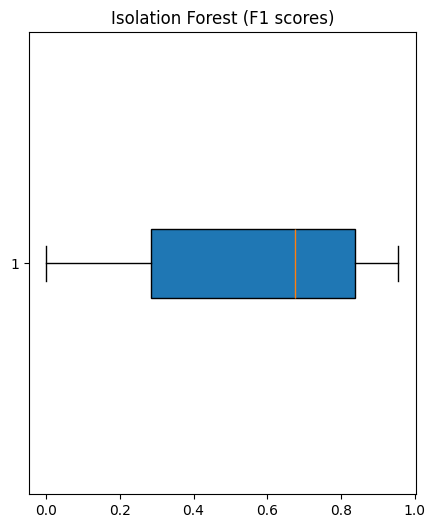

In [25]:
fig,ax=plt.subplots(figsize=(5,6))
ax.boxplot(f1_scores,patch_artist = True,
                notch =False, vert = 0)
ax.set_title("Isolation Forest (F1 scores)")
fig.savefig(f"type_{anomaly_type}_iso_forest.png")

In [26]:
f1_score_dict={}
for idx,fi in enumerate(all_files):
    bid=int(fi.split("_")[0])
    f=f1_scores[idx]
    f1_score_dict[bid]=f

In [27]:
import joblib

In [28]:
joblib.dump(f1_score_dict,f"OUTPUT/SCORES/iso_forest_type_{anomaly_type}_f1_scores.pkl")

['OUTPUT/SCORES/iso_forest_type_3_f1_scores.pkl']